In [503]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

pd.set_option("display.max_columns",30)

In [504]:
barbados_processed_df = pd.read_csv("station_data_processed/barbados_hourly_processed_data.csv", index_col=0)
barbados_processed_df.index = pd.to_datetime(barbados_processed_df.index, errors='coerce')



In [505]:
barbados_processed_df.head()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,bme_slp,bme_alt,bme_hum,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,,
2020-06-08 15:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2020-06-08 15:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2020-06-08 15:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2020-06-08 15:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2020-06-08 15:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0


In [506]:
def statistics(df, hourly = False): 
    # turn objec index into datetime index
    df.index = pd.to_datetime(df.index)

    df = df.sort_index()

    if hourly:
        full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')  # min stands for minute frequency
        time_unit  = "hour"
    else:
        # Create a complete minute-wise index
        full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='min')  # min stands for minute frequency
        time_unit  = "minute"
    
    # Reindex the dataframe to include all minutes, filling missing with NaN
    df = df.reindex(full_index) 

    # Total timespan/steps
    total_time = full_index.shape[0]

    # Actual measurements not Nan
    actual_measurements = df.notna().sum()
    relative_measurements = actual_measurements / total_time * 100

    # Non - zero measurments 
    zero_measurements = (df == 0).sum()
    nan_count = df.isna().sum()
    
    non_zero_measurements = actual_measurements - zero_measurements
    relative_non_zero_measurements = non_zero_measurements / total_time * 100
    nonzerorelativetoactual = non_zero_measurements / actual_measurements * 100
    
    print(f"Total {time_unit}s: {total_time}")
    print(f"Total {time_unit}s: 100%")
    print(f"Actual measurements: {actual_measurements}")
    print(f"Relative measurements: {relative_measurements:.2f}%")
    print(f"Non-zero measurements: {non_zero_measurements}")
    print(f"Relative non-zero measurements: {relative_non_zero_measurements:.2f}%")
    print(f"Non-zero relative to actual: {nonzerorelativetoactual:.2f}%")
    print(f"Zero measurements: {zero_measurements}")
    print(f"NaN measurements: {nan_count}")

In [507]:
def plot_hist(df, var_name, station, save=False):

    staion_name = station
    # Create a histogram with log scale on the y-axis
    
    plt.figure(figsize=(14,6) )
    plt.hist(df[var_name], bins=50, log=True, color='mediumblue', edgecolor='black')     

    # Add labels and title
    plt.xlabel(f"{var_name.capitalize()} Bins")
    plt.ylabel("Count (Log Scale)")
    plt.title(f"{station.capitalize()}: Histogram of {var_name.capitalize()} with Log Scale")
    plt.grid(True)

    if save:
    # Check if the 'eda' directory exists, if not, create it
        save_dir = "eda"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
            
        plt.savefig(f"eda/{staion_name}_{var_name}_hist.png")
        print(f"Figure saved as eda/{staion_name}_{var_name}_hist.png")

    # Display the plot
    plt.show()





In [508]:
summary = statistics(barbados_processed_df["wind_speed"])


Total minutes: 1817508
Total minutes: 100%
Actual measurements: 1736274
Relative measurements: 95.53%
Non-zero measurements: 1535107
Relative non-zero measurements: 84.46%
Non-zero relative to actual: 88.41%
Zero measurements: 201167
NaN measurements: 81234


Figure saved as eda/barbados_minutely_wind_speed_hist.png


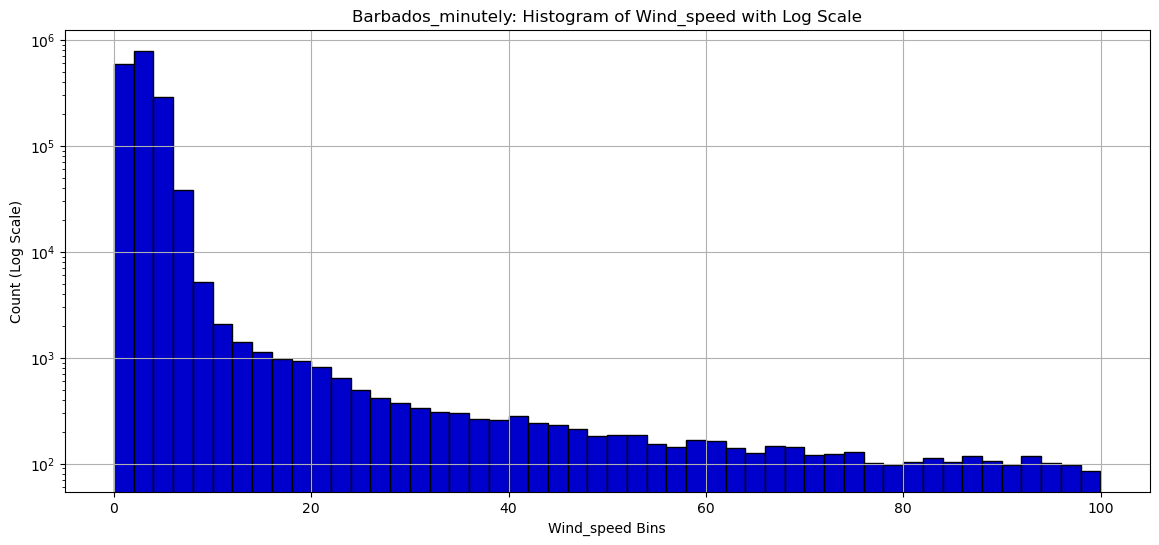

In [509]:
plot_hist(barbados_processed_df, "wind_speed", "barbados_minutely", save=True)

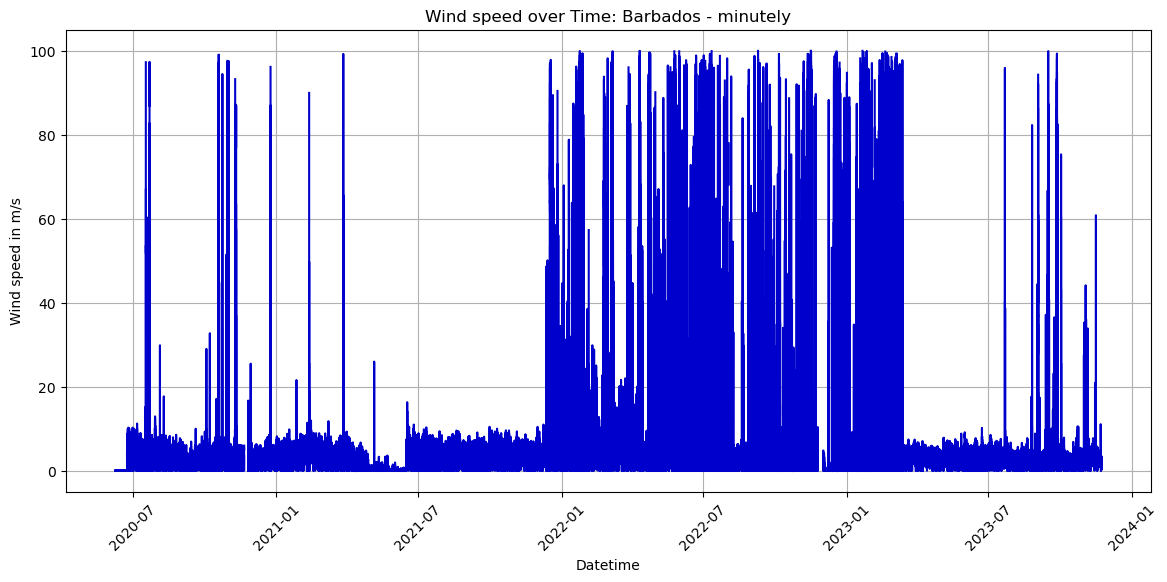

In [510]:
plt.figure(figsize=(14,6) )
plt.plot(barbados_processed_df["wind_speed"], color='mediumblue')
plt.xlabel("Datetime")
plt.ylabel("Wind speed in m/s") 
plt.title("Wind speed over Time: Barbados - minutely")
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig("eda/barbados_wind_speed_minutely_plot.png")

plt.show()

In [511]:
def circular_mean(series):
    """
    Calculate the mean direction for circular data (e.g., wind direction).
    """
    radians = np.deg2rad(series.dropna())
    sin_mean = np.nanmean(np.sin(radians))
    cos_mean = np.nanmean(np.cos(radians))
    mean_angle = np.arctan2(sin_mean, cos_mean)
    mean_angle_deg = np.rad2deg(mean_angle)
    if mean_angle_deg < 0:
        mean_angle_deg += 360
    return mean_angle_deg

def custom_aggregation(var_name):
    """
    Define custom aggregation functions for different variables during resampling.
    """
    def aggregate(series):
        # Exclude if the series has too many missing values
        if series.isna().sum() > 20:
            return np.nan
        # Exclude if the series has fewer than 3 unique values (except for 'tipping')
        if var_name != 'tipping' and series.nunique() <= 3:
            return np.nan

        if var_name == 'tipping':
            # Sum for precipitation
            return series.sum()
        elif var_name == 'wind_speed':
            # Mean for wind speed
            return series.mean()
        elif var_name == 'wind_dir':
            # Circular mean for wind direction
            return circular_mean(series)
        else:
            # Median for other variables
            return series.median()
    return aggregate

aggregation_dict = {'bmp180_temp': "mean",
                    'bmp180_pres': "mean",
                    'bmp180_slp': "mean",
                    'bmp180_alt': "mean",
                    'bmp280_temp': "mean",
                    'bmp280_pres': "mean",
                    'bmp280_slp': "mean",
                    'bmp280_alt': "mean",
                    'bme_temp': "mean",
                    'bme_pres': "mean",
                    'bme_slp': "mean",
                    'bme_alt': "mean",
                    'bme_hum': "mean",
                    'htu_temp': "mean",
                    'htu_hum': "mean",
                    'mcp9808': "mean",
                    'tipping': "sum",
                    'vis_light': "mean",
                    'ir_light': "mean",
                    'uv_light': "mean",
                    'wind_dir': "mean",
                    'wind_speed': "mean"}

In [512]:
hourly_df = pd.DataFrame()

for var_name in barbados_processed_df.columns:
    hourly_series = barbados_processed_df[var_name].resample('h').apply(custom_aggregation(var_name))
    hourly_df[var_name] = hourly_series

In [513]:
hourly_df

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,bme_slp,bme_alt,bme_hum,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,,
2020-06-08 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-06-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-06-08 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-06-08 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-06-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 15:00:00,NaN,NaN,NaN,NaN,28.66,982.875,1013.750,NaN,NaN,NaN,NaN,NaN,NaN,10.4,NaN,27.30,0.0,845.0,6304.5,315.0,NaN,2.128167
2023-11-22 16:00:00,NaN,NaN,NaN,NaN,29.05,982.170,1012.980,NaN,NaN,NaN,NaN,NaN,NaN,11.6,NaN,27.60,0.0,923.0,7158.5,356.5,NaN,2.052167
2023-11-22 17:00:00,NaN,NaN,NaN,NaN,28.84,981.645,1012.470,NaN,NaN,NaN,NaN,NaN,NaN,11.7,NaN,27.40,0.0,730.0,5044.5,253.5,NaN,2.274000


In [514]:
summary = statistics(hourly_df["wind_speed"], hourly=True)


Total hours: 30293
Total hours: 100%
Actual measurements: 26956
Relative measurements: 88.98%
Non-zero measurements: 26956
Relative non-zero measurements: 88.98%
Non-zero relative to actual: 100.00%
Zero measurements: 0
NaN measurements: 3337


Figure saved as eda/barbados_hourly_wind_speed_hist.png


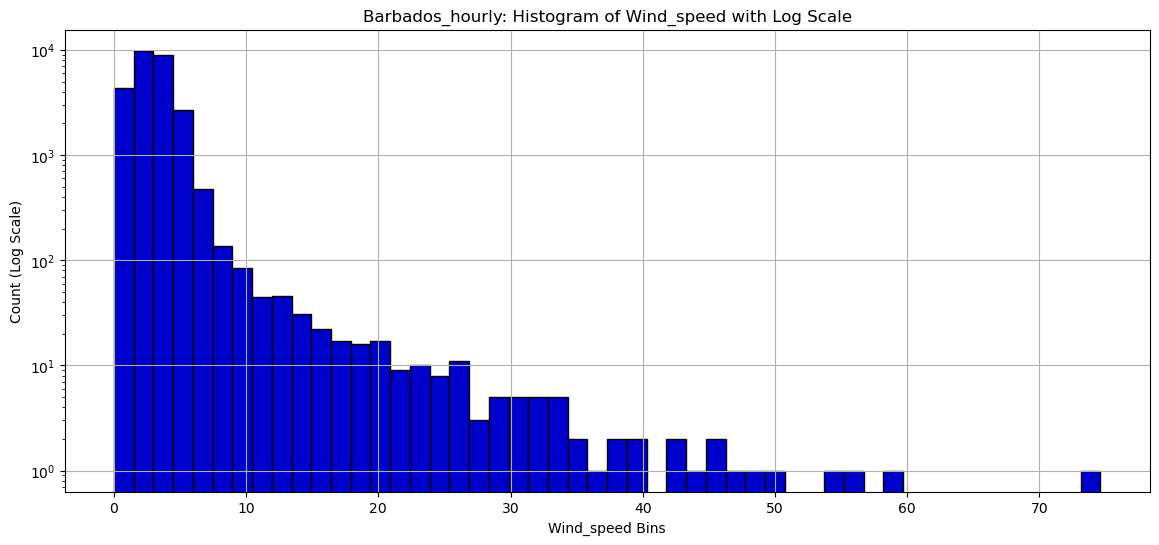

In [515]:
plot_hist(hourly_df, "wind_speed", "barbados_hourly", save=True)


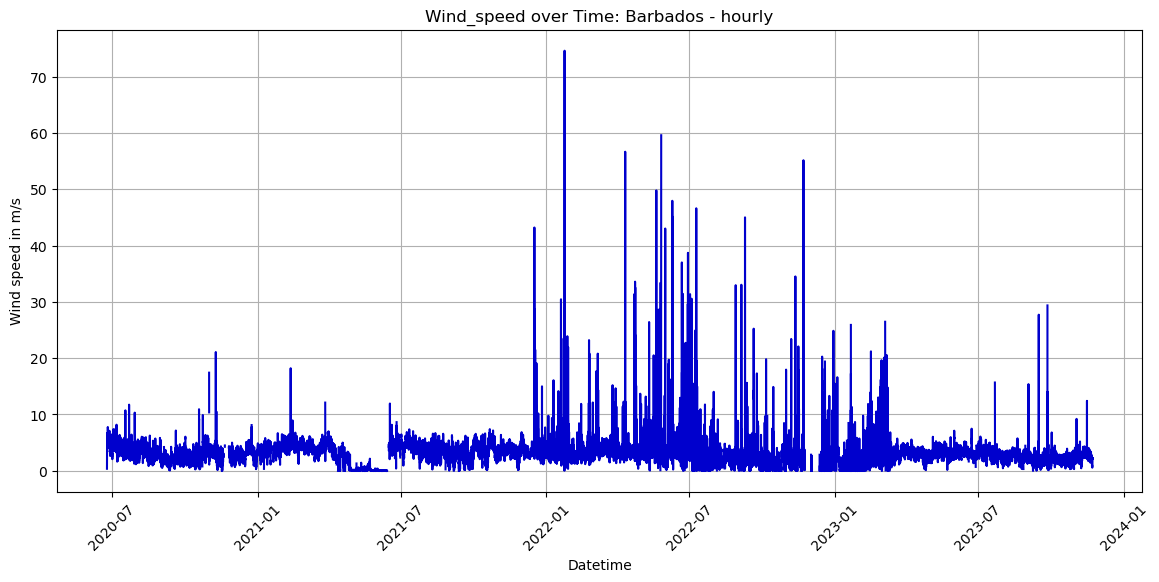

In [516]:
plt.figure(figsize=(14,6) )
plt.plot(hourly_df["wind_speed"], color='mediumblue')
plt.xlabel("Datetime")
plt.ylabel("Wind speed in m/s")
plt.title("Wind_speed over Time: Barbados - hourly")
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig("eda/barbados_wind_speed_hourly_plot.png")

plt.show()

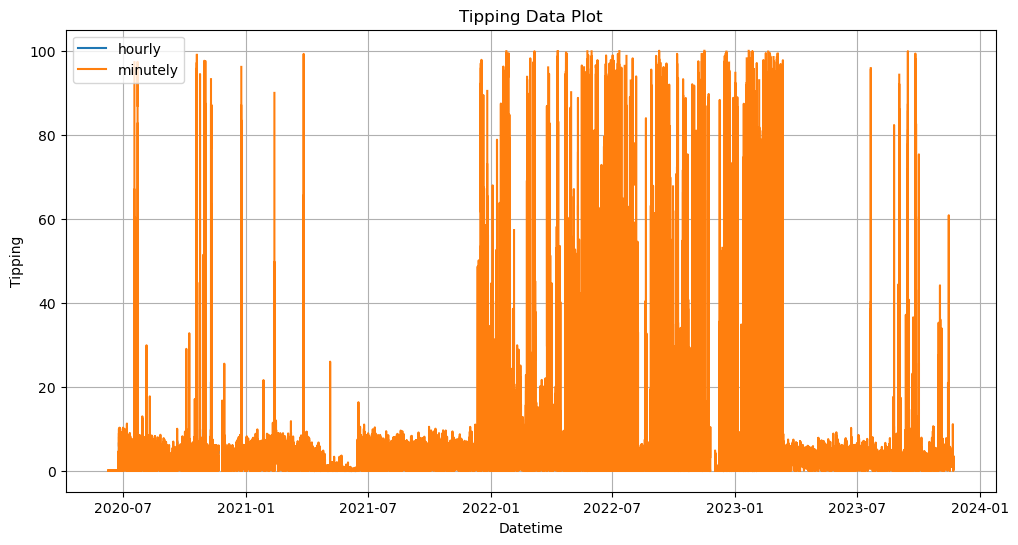

In [517]:
plt.figure(figsize=(12,6) )
plt.plot(hourly_df["wind_speed"], label="hourly")


plt.plot(barbados_processed_df["wind_speed"], label="minutely")

plt.xlabel("Datetime")
plt.ylabel("Tipping")
plt.title("Tipping Data Plot")
plt.legend()
plt.grid(True)




plt.show()

In [518]:
summary = statistics(hourly_df["tipping"], hourly=True)


Total hours: 30293
Total hours: 100%
Actual measurements: 29008
Relative measurements: 95.76%
Non-zero measurements: 2868
Relative non-zero measurements: 9.47%
Non-zero relative to actual: 9.89%
Zero measurements: 26140
NaN measurements: 1285


In [519]:
hourly_df.tail()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,bme_slp,bme_alt,bme_hum,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,,
2023-11-22 15:00:00,NaN,NaN,NaN,NaN,28.66,982.875,1013.750,NaN,NaN,NaN,NaN,NaN,NaN,10.4,NaN,27.30,0.0,845.0,6304.5,315.0,NaN,2.128167
2023-11-22 16:00:00,NaN,NaN,NaN,NaN,29.05,982.170,1012.980,NaN,NaN,NaN,NaN,NaN,NaN,11.6,NaN,27.60,0.0,923.0,7158.5,356.5,NaN,2.052167
2023-11-22 17:00:00,NaN,NaN,NaN,NaN,28.84,981.645,1012.470,NaN,NaN,NaN,NaN,NaN,NaN,11.7,NaN,27.40,0.0,730.0,5044.5,253.5,NaN,2.274000
2023-11-22 18:00:00,NaN,NaN,NaN,NaN,28.37,981.230,1012.085,NaN,NaN,NaN,NaN,NaN,NaN,11.6,NaN,26.95,0.0,589.0,3605.0,178.0,NaN,2.291500
2023-11-22 19:00:00,NaN,NaN,NaN,NaN,28.48,981.090,1011.920,NaN,NaN,NaN,NaN,NaN,NaN,11.5,NaN,27.00,0.0,554.0,3272.0,159.0,NaN,2.121905


In [520]:
hourly_series = barbados_raw_df["tipping"].resample('h').apply(custom_aggregation('tipping'))
hourly_series

NameError: name 'barbados_raw_df' is not defined